In [11]:
#Import the Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [12]:
#Load the dataset 
review=pd.read_csv('/content/reviews (3).csv',encoding='latin1')
review

,id,profileName,text,date,title,rating,images,helpful,Colour,Size name,Style name
0,R25KFOLHGOPOUU,Ritesh Saste,"Bought the 6GB Ram variant for my Dad, so I do...",Reviewed in India on 22 August 2022,Good phone for decent price,4,NaN,6,Stealth Black,6GB RAM,128GB Storage
1,R1DZ1GRKSOE4AZ,Rajesh,"Mobile is working very nice, using from 15 day...",Reviewed in India on 24 August 2022,Very good mobile,4,NaN,1,Stealth Black,6GB RAM,128GB Storage
2,R2Q1HS3SZBLW6F,Raghav,"battery life is good, fingerprint is good and ...",Reviewed in India on 24 August 2022,Display resolution is weak. sAMOLED screen res...,4,https://m.media-amazon.com/images/I/61GjtiaVU0...,1,Mirage Blue,6GB RAM,128GB Storage
3,R5AFRMLSK297Q,Danish Raza,Back Camera quality very badDetails very poor ...,Reviewed in India on 19 August 2022,"Back Camera quality very downgrade ,getting po...",4,https://m.media-amazon.com/images/I/61-gvUxwJt...,0,Phantom White,6GB RAM,128GB Storage
4,RID9U5YFDZUHZ,Arijit D.,Low light camera is very pore. No pocket mode ...,Reviewed in India on 22 August 2022,Low light camera is very pore. No Pocket mode ...,4,https://m.media-amazon.com/images/I/81Cb6G856j...,0,Phantom White,6GB RAM,128GB Storage
...,...,...,...,...,...,...,...,...,...,...,...
995,R1XU2SWFKU2APQ,akil malik,"From the third day it used to hang, so called ...",Reviewed in India on 13 August 2022,Worst Product ever,1,NaN,1,Stealth Black,6GB RAM,128GB Storage
996,R2ULHJ9XS0XBF,Ravi,"Some bugs, Slow delivery, 4k not support and c...",Reviewed in India on 27 March 2022,"Some bugs, slow delivery, 4k not support ,and ...",4,NaN,0,Stealth Black,6GB RAM,128GB Storage
997,R6XSWP0MXCZPZ,sudhansu kumar behera,Don't buy this product camera quality,Reviewed in India on 18 August 2022,Game lage & vga camera,2,NaN,0,Mirage Blue,6GB RAM,128GB Storage
998,R3GNVWFMH3QVV0,Sayantan R.,Not worth buying,Reviewed in India on 21 August 2022,Not worth buying,2,NaN,0,Stealth Black,8GB RAM,256GB Storage


In [13]:
#Dropping the unwanted columns 
review.drop(['date'],inplace=True,axis=1)
review.drop(['id'],inplace=True,axis=1)
review.drop(['title'],inplace=True,axis=1)
review.drop(['rating'],inplace=True,axis=1)
review.drop(['helpful'],inplace=True,axis=1)
review.drop(['Colour'],inplace=True,axis=1)
review.drop(['Size name'],inplace=True,axis=1)
review.drop(['profileName'],inplace=True,axis=1)
review

,text,images,Style name
0,"Bought the 6GB Ram variant for my Dad, so I do...",NaN,128GB Storage
1,"Mobile is working very nice, using from 15 day...",NaN,128GB Storage
2,"battery life is good, fingerprint is good and ...",https://m.media-amazon.com/images/I/61GjtiaVU0...,128GB Storage
3,Back Camera quality very badDetails very poor ...,https://m.media-amazon.com/images/I/61-gvUxwJt...,128GB Storage
4,Low light camera is very pore. No pocket mode ...,https://m.media-amazon.com/images/I/81Cb6G856j...,128GB Storage
...,...,...,...
995,"From the third day it used to hang, so called ...",NaN,128GB Storage
996,"Some bugs, Slow delivery, 4k not support and c...",NaN,128GB Storage
997,Don't buy this product camera quality,NaN,128GB Storage
998,Not worth buying,NaN,256GB Storage


In [14]:
#Still need to drop 2 more columns 
review.drop(['images'],inplace=True,axis=1)
review.drop(['Style name'],inplace=True,axis=1)
review

,text
0,"Bought the 6GB Ram variant for my Dad, so I do..."
1,"Mobile is working very nice, using from 15 day..."
2,"battery life is good, fingerprint is good and ..."
3,Back Camera quality very badDetails very poor ...
4,Low light camera is very pore. No pocket mode ...
...,...
995,"From the third day it used to hang, so called ..."
996,"Some bugs, Slow delivery, 4k not support and c..."
997,Don't buy this product camera quality
998,Not worth buying


In [15]:
#Cheking for null values in data 
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    956 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [16]:
review.isnull().sum()

text    44
dtype: int64

In [17]:
#Dropping the Null value records and again inspecting data for same 
review1=review.dropna()

In [18]:
review1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    956 non-null    object
dtypes: object(1)
memory usage: 14.9+ KB


In [19]:
review1.isnull().sum()

text    0
dtype: int64

In [20]:
#TEXT PREPROCESSING
review1=[text.strip() for text in review1.text] # remove both the leading and the trailing characters
review1=[text for text in review1 if text] # removes empty strings, because they are considered in Python as False
review1[0:20]

["Bought the 6GB Ram variant for my Dad, so I don't have use of the graphics or speed.As for the camera, don't let the heavy specs fool you. And expect more than 64MP quality wise.More than enough for the price range though. As didn't find many options in 5g phones at the time with good camera's.Nice build quality, default cover is provided, comes with 67Watt charger, good charging speed, battery lasts about 2+days on normal usage, above normal usage also lasts the whole day.",
 'Mobile is working very nice, using from 15 day no any problem but battery and camera quality should be more better in this mobile. 4K video recording missing, Alexa app  not good but OK. Google assistant automatically On without any command.',
 'battery life is good, fingerprint is good and camera quality is not good working lowest pixels. Actually pixel size 64mp not working 108. But all features is perfect best performance.',
 "Back Camera quality very badDetails very poor I upload some camera sample it's ph

In [21]:
#Combining above data into one string or text form
review1_text=' '.join(review1)
review1_text[:1000]

"Bought the 6GB Ram variant for my Dad, so I don't have use of the graphics or speed.As for the camera, don't let the heavy specs fool you. And expect more than 64MP quality wise.More than enough for the price range though. As didn't find many options in 5g phones at the time with good camera's.Nice build quality, default cover is provided, comes with 67Watt charger, good charging speed, battery lasts about 2+days on normal usage, above normal usage also lasts the whole day. Mobile is working very nice, using from 15 day no any problem but battery and camera quality should be more better in this mobile. 4K video recording missing, Alexa app  not good but OK. Google assistant automatically On without any command. battery life is good, fingerprint is good and camera quality is not good working lowest pixels. Actually pixel size 64mp not working 108. But all features is perfect best performance. Back Camera quality very badDetails very poor I upload some camera sample it's phone and i hav

In [34]:
#Remove Punctuations 
no_punc_text=review1_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'Bought the 6GB Ram variant for my Dad so I dont have use of the graphics or speedAs for the camera dont let the heavy specs fool you And expect more than 64MP quality wiseMore than enough for the price range though As didnt find many options in 5g phones at the time with good camerasNice build quality default cover is provided comes with 67Watt charger good charging speed battery lasts about 2days on normal usage above normal usage also lasts the whole day Mobile is working very nice using from 15 day no any problem but battery and camera quality should be more better in this mobile 4K video recording missing Alexa app  not good but OK Google assistant automatically On without any command battery life is good fingerprint is good and camera quality is not good working lowest pixels Actually pixel size 64mp not working 108 But all features is perfect best performance Back Camera quality very badDetails very poor I upload some camera sample its phone and i have got defective phone all of

In [35]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Bought', 'the', '6GB', 'Ram', 'variant', 'for', 'my', 'Dad', 'so', 'I', 'dont', 'have', 'use', 'of', 'the', 'graphics', 'or', 'speedAs', 'for', 'the', 'camera', 'dont', 'let', 'the', 'heavy', 'specs', 'fool', 'you', 'And', 'expect', 'more', 'than', '64MP', 'quality', 'wiseMore', 'than', 'enough', 'for', 'the', 'price', 'range', 'though', 'As', 'didnt', 'find', 'many', 'options', 'in', '5g', 'phones']


In [37]:
#Token counting 
len(text_tokens)

23188

In [38]:
#Removing Stopwords from the text 
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
no_stop_tokens[:50]

['Bought',
 '6GB',
 'Ram',
 'variant',
 'Dad',
 'dont',
 'use',
 'graphics',
 'speedAs',
 'camera',
 'dont',
 'let',
 'heavy',
 'specs',
 'fool',
 'And',
 'expect',
 '64MP',
 'quality',
 'wiseMore',
 'enough',
 'price',
 'range',
 'though',
 'As',
 'didnt',
 'find',
 'many',
 'options',
 '5g',
 'phones',
 'time',
 'good',
 'camerasNice',
 'build',
 'quality',
 'default',
 'cover',
 'provided',
 'comes',
 '67Watt',
 'charger',
 'good',
 'charging',
 'speed',
 'battery',
 'lasts',
 '2days',
 'normal',
 'usage']

In [39]:
#Normalising data into lower case alphabets 
lower_words=[text.lower() for text in no_stop_tokens]
lower_words[:50]

['bought',
 '6gb',
 'ram',
 'variant',
 'dad',
 'dont',
 'use',
 'graphics',
 'speedas',
 'camera',
 'dont',
 'let',
 'heavy',
 'specs',
 'fool',
 'and',
 'expect',
 '64mp',
 'quality',
 'wisemore',
 'enough',
 'price',
 'range',
 'though',
 'as',
 'didnt',
 'find',
 'many',
 'options',
 '5g',
 'phones',
 'time',
 'good',
 'camerasnice',
 'build',
 'quality',
 'default',
 'cover',
 'provided',
 'comes',
 '67watt',
 'charger',
 'good',
 'charging',
 'speed',
 'battery',
 'lasts',
 '2days',
 'normal',
 'usage']

In [40]:
#Stemming using NLTK library
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
stemmed_tokens[:50]

['bought',
 '6gb',
 'ram',
 'variant',
 'dad',
 'dont',
 'use',
 'graphic',
 'speeda',
 'camera',
 'dont',
 'let',
 'heavi',
 'spec',
 'fool',
 'and',
 'expect',
 '64mp',
 'qualiti',
 'wisemor',
 'enough',
 'price',
 'rang',
 'though',
 'as',
 'didnt',
 'find',
 'mani',
 'option',
 '5g',
 'phone',
 'time',
 'good',
 'camerasnic',
 'build',
 'qualiti',
 'default',
 'cover',
 'provid',
 'come',
 '67watt',
 'charger',
 'good',
 'charg',
 'speed',
 'batteri',
 'last',
 '2day',
 'normal',
 'usag']

In [41]:
#Lemmetization of data using spacy 
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
doc[:1000]

bought 6gb ram variant dad dont use graphics speedas camera dont let heavy specs fool and expect 64mp quality wisemore enough price range though as didnt find many options 5g phones time good camerasnice build quality default cover provided comes 67watt charger good charging speed battery lasts 2days normal usage normal usage also lasts whole day mobile working nice using 15 day problem battery camera quality better mobile 4k video recording missing alexa app good ok google assistant automatically on without command battery life good fingerprint good camera quality good working lowest pixels actually pixel size 64mp working 108 but features perfect best performance back camera quality baddetails poor upload camera sample phone got defective phone check inside camera lens dust front side dull scratch low light camera pore no pocket mode optionno notification indicator its plain hype battery doesnt even give whole day moreover even till 18th august a12 update provided 6 months launch cam

In [42]:
lemmas=[token.lemma_ for token in doc]
lemmas[:50]

['buy',
 '6',
 'gb',
 'ram',
 'variant',
 'dad',
 'do',
 'not',
 'use',
 'graphic',
 'speeda',
 'camera',
 'do',
 'not',
 'let',
 'heavy',
 'spec',
 'fool',
 'and',
 'expect',
 '64mp',
 'quality',
 'wisemore',
 'enough',
 'price',
 'range',
 'though',
 'as',
 'do',
 'not',
 'find',
 'many',
 'option',
 '5',
 'g',
 'phone',
 'time',
 'good',
 'camerasnice',
 'build',
 'quality',
 'default',
 'cover',
 'provide',
 'come',
 '67watt',
 'charger',
 'good',
 'charge',
 'speed']

In [43]:
clean_reviews=' '.join(lemmas)
clean_reviews[:1000]

'buy 6 gb ram variant dad do not use graphic speeda camera do not let heavy spec fool and expect 64mp quality wisemore enough price range though as do not find many option 5 g phone time good camerasnice build quality default cover provide come 67watt charger good charge speed battery last 2days normal usage normal usage also last whole day mobile work nice use 15 day problem battery camera quality well mobile 4k video recording miss alexa app good ok google assistant automatically on without command battery life good fingerprint good camera quality good work low pixel actually pixel size 64mp work 108 but feature perfect good performance back camera quality baddetail poor upload camera sample phone get defective phone check inside camera lens dust front side dull scratch low light camera pore no pocket mode optionno notification indicator its plain hype battery do not even give whole day moreover even till 18th august a12 update provide 6 month launch camera decent do not expect captu

In [44]:
#Feature Extraction using count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [45]:
print(cv.get_feature_names()[:100])

['0100', '01006', '10', '100', '1000', '10000', '100back', '100phone', '100â', '1010', '1010brightness', '1010you', '1015min', '103', '104', '108', '1080', '1080p', '1080p30fps', '1080p60fps', '1080pbattery', '1080phang', '1080punder', '108mega', '108mp', '108mp4', '108mpaverage', '108mpoverall', '109mp', '10bettery', '10k', '10k15k', '10mp', '10out', '10th', '10thik', '10thousand', '11', '1112k', '11hanging', '11k', '11pro', '11proit', '11x', '12', '120', '1200', '12000', '1200nit', '120ght', '120hz', '120hzthe', '1215', '124', '128', '12mp', '12sometimes', '12these', '13', '132', '134', '13500â', '13poor', '13the', '14', '14000', '1415', '14500', '14k', '15', '150', '1500', '15000', '15000â', '1520', '1520min', '15500', '15k', '15k18k', '15k3', '15kbudget', '15ki', '15min', '16', '16k', '16mp', '18', '1819k', '18500', '185k', '18th', '1920k', '19500', '19k', '1amoled', '1day', '1good', '1hour', '1s', '1sometime']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
print(reviewscv.toarray()[:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
print(reviewscv.toarray().shape)

(15354, 2928)


In [49]:
#countvectorizer with bi grams and tri grams 
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [50]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())
print(bow_matrix_ngram.toarray().shape)

['108', '108mp', '11', '4k', 'also', 'app', 'average', 'awesome', 'back', 'backup', 'bad', 'battery', 'be', 'but', 'buy', 'call', 'camera', 'charge', 'charger', 'come', 'day', 'device', 'display', 'do', 'even', 'excellent', 'expect', 'experience', 'fast', 'feature', 'feel', 'fingerprint', 'front', 'game', 'gb', 'get', 'give', 'go', 'good', 'great', 'hang', 'high', 'issue', 'its', 'lag', 'last', 'life', 'like', 'look', 'low', 'make', 'mi', 'mobile', 'money', 'month', 'mp', 'much', 'need', 'nice', 'no', 'normal', 'not', 'note', 'ok', 'one', 'overall', 'performance', 'phone', 'photo', 'play', 'plus', 'poor', 'price', 'pro', 'problem', 'product', 'purchase', 'quality', 'range', 'really', 'redmi', 'screen', 'sound', 'speaker', 'speed', 'support', 'take', 'thing', 'this', 'time', 'touch', 'update', 'upto', 'use', 'value', 'very', 'video', 'well', 'work', 'worth']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
(15354, 10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
#TF-IDF Vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [52]:
print(tfidfv_ngram_max_features.get_feature_names()[:200])
print(tfidf_matrix_ngram.toarray())
print(tfidf_matrix_ngram.toarray().shape)

['10', '100', '1010', '108', '1080p', '108mp', '11', '12', '120', '120hz', '128', '13', '15', '20', '20k', '256', '25k', '30', '40', '45', '4k', '50', '5000', '60hz', '64', '67', '67w', '695', 'able', 'accord', 'actually', 'after', 'all', 'almost', 'also', 'although', 'always', 'amazing', 'amazon', 'amole', 'and', 'android', 'another', 'anything', 'app', 'application', 'around', 'as', 'at', 'automatically', 'available', 'average', 'avg', 'awesome', 'back', 'backup', 'bad', 'basic', 'battery', 'be', 'become', 'better', 'big', 'bit', 'black', 'blue', 'bluetooth', 'both', 'box', 'brand', 'brightness', 'budget', 'bug', 'build', 'but', 'button', 'buy', 'call', 'caller', 'cam', 'camara', 'camera', 'camra', 'can', 'capture', 'card', 'change', 'charge', 'charger', 'charging', 'claim', 'clarity', 'clear', 'click', 'close', 'colour', 'come', 'comment', 'compare', 'condition', 'consider', 'contact', 'cool', 'could', 'cover', 'day', 'deal', 'decent', 'decide', 'default', 'delay', 'design', 'detail

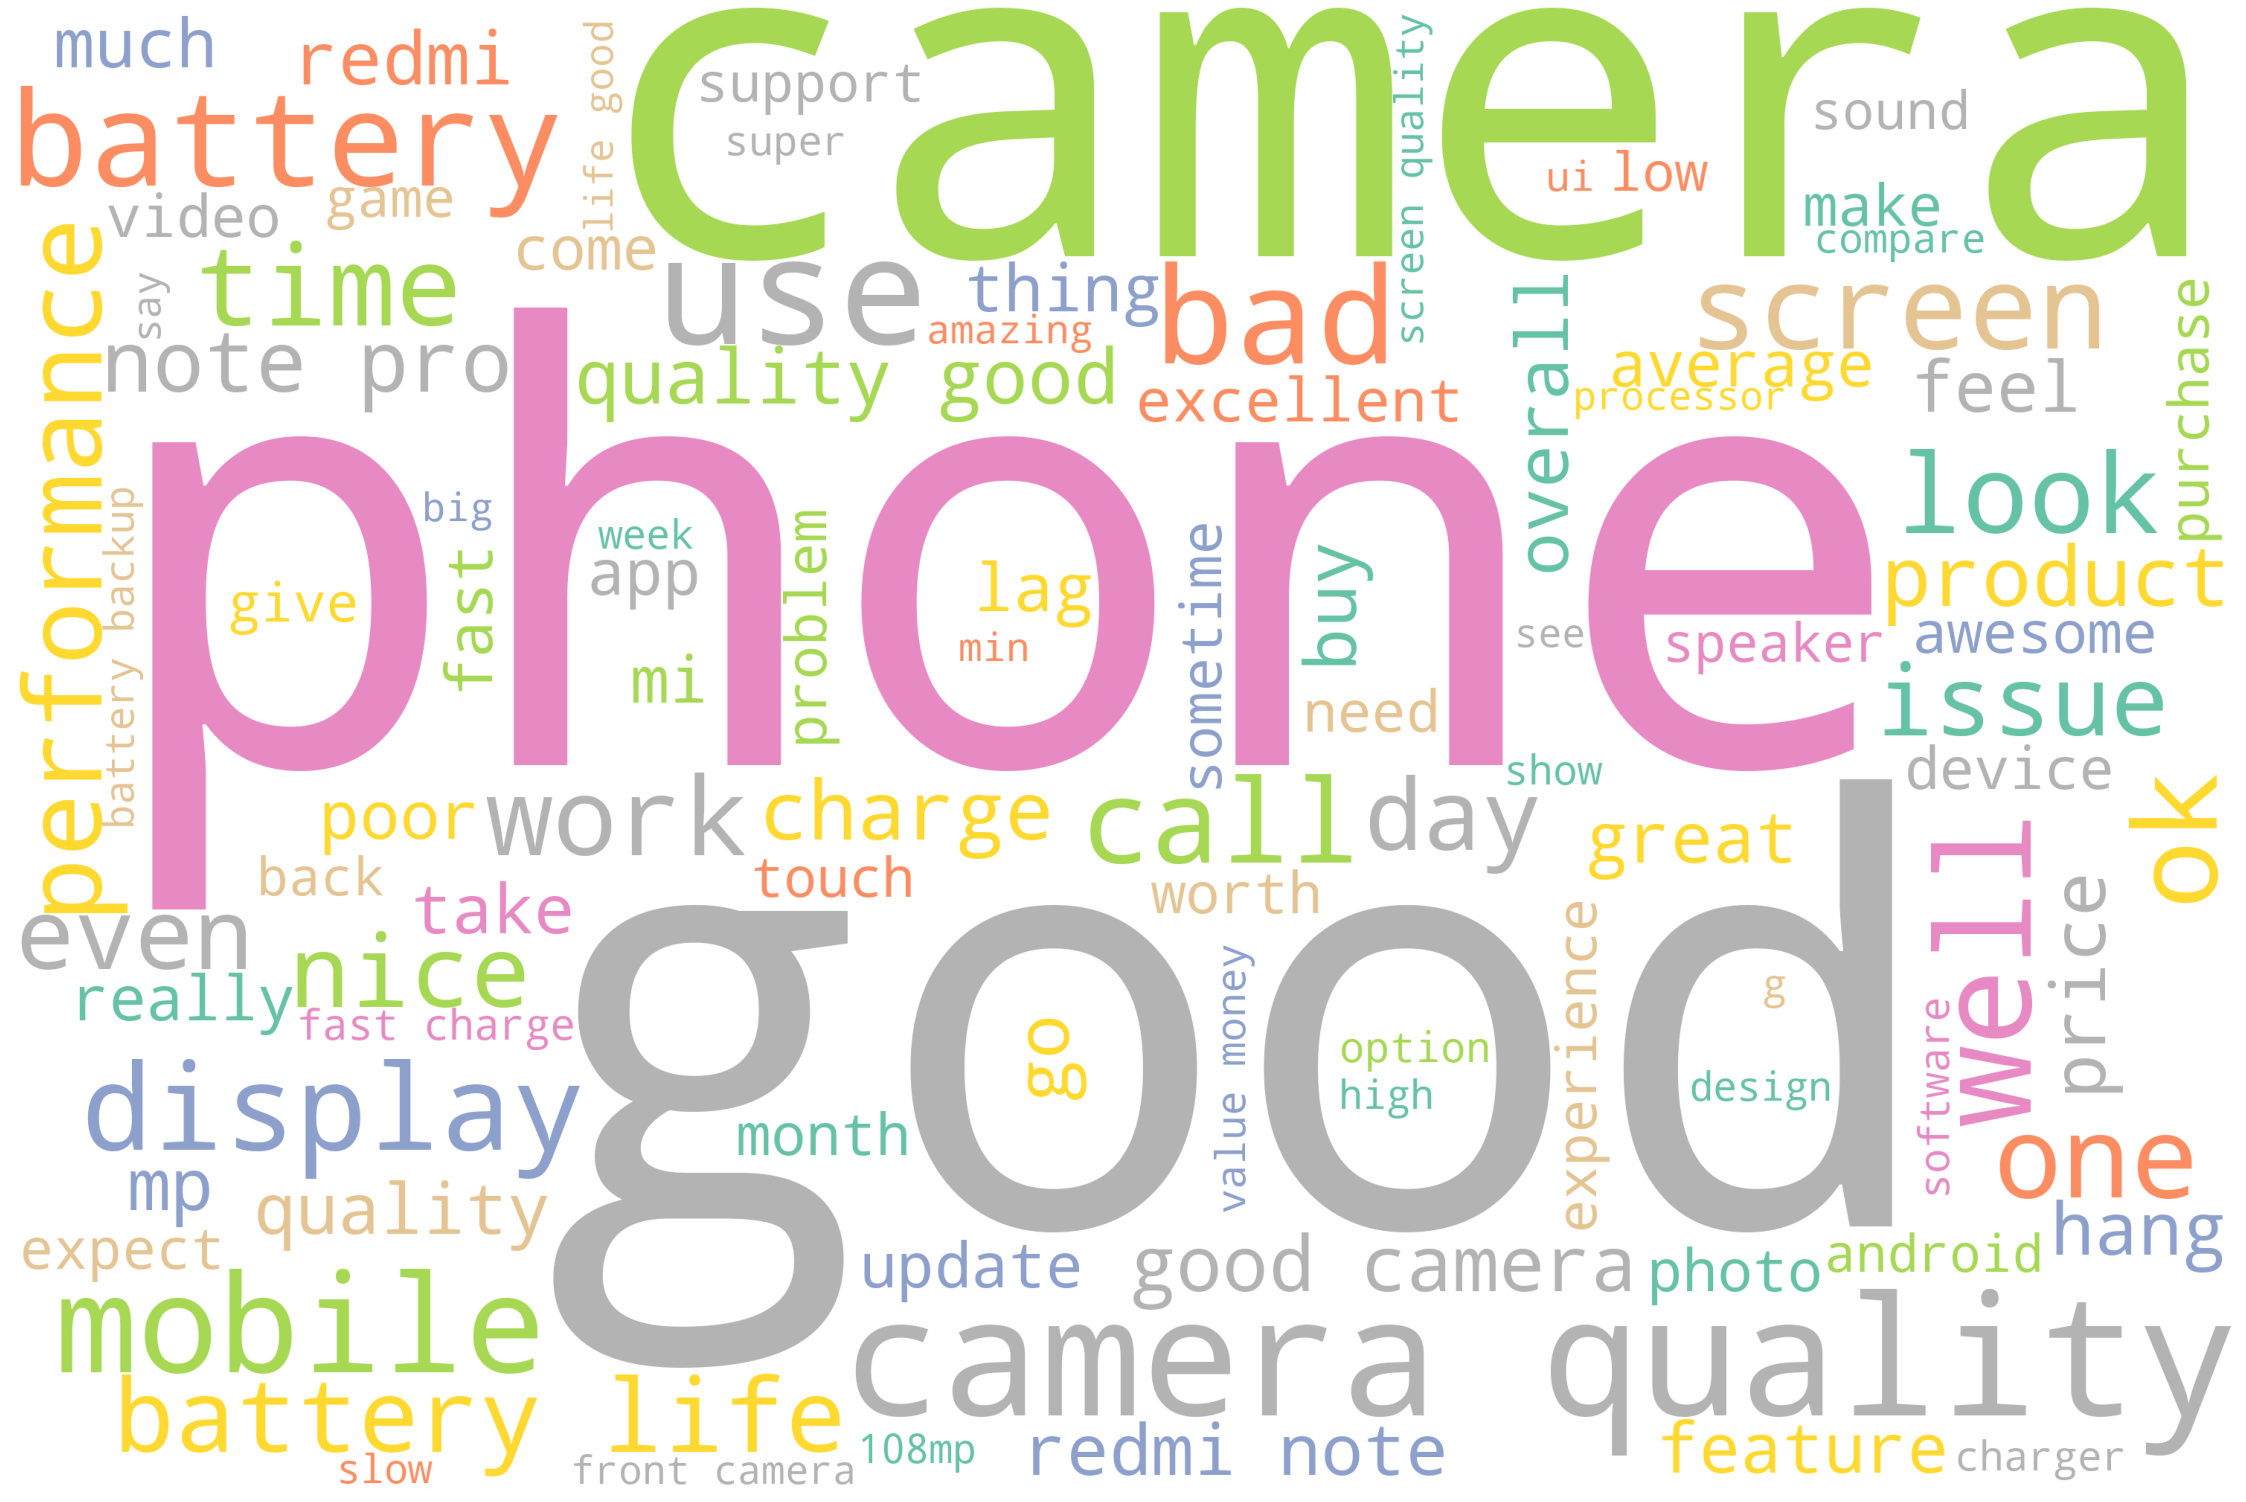

In [56]:
#Generating WORDCLOUD
#First define function for plot  
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')
#Generation of wordcloud 
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                    colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

In [57]:
#Named Entity Recognition(NER)
#Parts od Speech (POS) Tagging 
#nlp=spacy.load('en')
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [58]:
#Displaying Noun verb and other parts of speech 
for token in doc_block[100:200]:
    print(token,token.pos_)

size NOUN
64mp NOUN
work NOUN
108 NUM
but CCONJ
feature VERB
perfect ADJ
good ADJ
performance NOUN
back ADP
camera NOUN
quality NOUN
baddetail NOUN
poor ADJ
upload NOUN
camera NOUN
sample NOUN
phone NOUN
get VERB
defective ADJ
phone NOUN
check NOUN
inside ADP
camera NOUN
lens NOUN
dust NOUN
front ADJ
side NOUN
dull ADJ
scratch NOUN
low ADJ
light ADJ
camera NOUN
pore NOUN
no DET
pocket NOUN
mode NOUN
optionno NUM
notification NOUN
indicator NOUN
its PRON
plain ADJ
hype NOUN
battery NOUN
do AUX
not PART
even ADV
give VERB
whole ADJ
day NOUN
moreover ADV
even ADV
till SCONJ
18th ADJ
august PROPN
a12 NOUN
update NOUN
provide VERB
6 NUM
month NOUN
launch NOUN
camera NOUN
decent ADJ
do AUX
not PART
expect VERB
capture NOUN
awesome ADJ
pic NOUN
happy ADJ
phone NOUN
good ADJ
design NOUN
good ADJ
display NOUN
hand NOUN
feel VERB
also ADV
good ADJ
future ADJ
proof NOUN
5 NUM
g NOUN
handset VERB
overall ADJ
good ADJ
choice NOUN
price NOUN
point NOUN
camera NOUN
quality NOUN
less ADV
typical ADJ
r

In [59]:
#filtering the Nouns and Verbs only 
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['g', 'handset', 'choice', 'price', 'point', 'camera', 'quality', 'redmi', 'devicesperformance', 'lag', 'sometimeslike', 'condition', 'lag', 'oneplus', 'sayall', 'android', 'task', 'done', 'graphicsheating', 'device', 'buy', 'want', 'bit', 'grab', 'find', '22k', 'auto', 'car', 'let', 'play', 'video', 'know', 'think', 'get', 'year', 'usage', 'phone', 'compromise', 'camera', 'video', 'quality', 'speaker', 'bit', 'bass', 'display', 'ð\x9f\x94¥ð\x9f\x94¥', 'battery', 'charge', 'camera', 'camera', 'install', 'phone', 'prosdisplaybatteryram', 'camera', 'resolution', 'detail', 'imageno', 'video', 'supportcompass', 'show', 'directioncompare', 'redmi', 'note', 'phone', 'look', 'phone', 'camra', 'quality', 'look', 'phone', 'camera', 'battery', 'life', 'screen', 'brightness', 'sunlight', 'phone', 'look', 'camera', 'quality', 'display', 'phone', 'comes', 'customise', 'android', 'ram', 'phone', 'hang', 'u', 'record', 'call', 'make', 'announcement', 'call', 'call', 'camera', 'upto', 'display', 'qual

In [60]:
#counting Noun and Verb Tokens 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] #Viewing top 10 records

,word,count
0,camera,564
1,phone,505
2,quality,330
3,battery,218
4,use,147
5,charge,128
6,screen,108
7,note,103
8,display,99
9,call,96


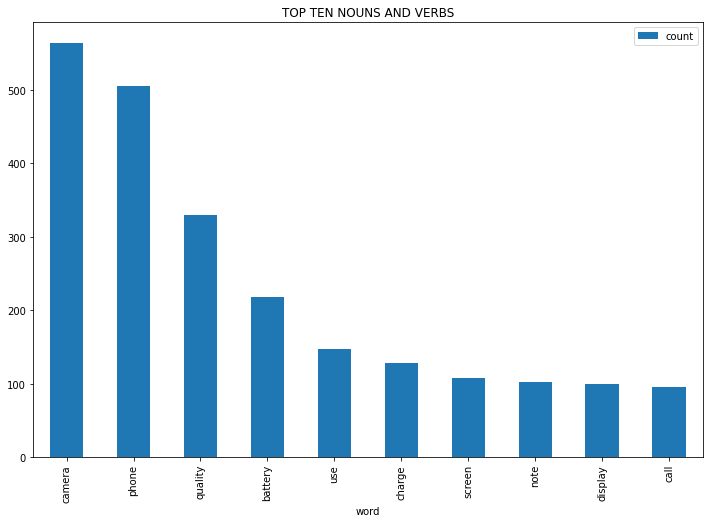

In [61]:
#Visualizing the top 10 records obtained in bar plot 
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='TOP TEN NOUNS AND VERBS')

In [62]:
#EMOTION MINING OF TWEETS SENTIMENT ANALYSIS 
#for this purpose forming a sentences of the tweets 
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(review1))
sentences[:10]

["Bought the 6GB Ram variant for my Dad, so I don't have use of the graphics or speed.As for the camera, don't let the heavy specs fool you.",
 'And expect more than 64MP quality wise.More than enough for the price range though.',
 "As didn't find many options in 5g phones at the time with good camera's.Nice build quality, default cover is provided, comes with 67Watt charger, good charging speed, battery lasts about 2+days on normal usage, above normal usage also lasts the whole day.",
 'Mobile is working very nice, using from 15 day no any problem but battery and camera quality should be more better in this mobile.',
 '4K video recording missing, Alexa app  not good but OK. Google assistant automatically On without any command.',
 'battery life is good, fingerprint is good and camera quality is not good working lowest pixels.',
 'Actually pixel size 64mp not working 108.',
 'But all features is perfect best performance.',
 "Back Camera quality very badDetails very poor I upload some c

In [64]:
#Transforming into a DataFrame 
#Sentence wise tokenization 
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"Bought the 6GB Ram variant for my Dad, so I do..."
1,And expect more than 64MP quality wise.More th...
2,As didn't find many options in 5g phones at th...
3,"Mobile is working very nice, using from 15 day..."
4,"4K video recording missing, Alexa app not goo..."
...,...
1283,since iam using last 1week.
1284,"Camera is not like 108 mp, ui is buggy, doesn'..."
1285,No other brand is giving this much in this pri...
1286,â¤ï¸â¤ï¸â¤ï¸ This phone is very good I l...


In [65]:
#Emotion lexicon using Affin csv
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [66]:
#converting affin lexicon into a dictionary form
#and assigning the values to dictionary
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [67]:
#custom function: score each word in a sentence in lemmatised form,
#but calculate the score for whole original sentence 
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [68]:
#manual testing for above 
calculate_sentiment(text='excellent service')

3

In [69]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      -2
1       0
2       9
3       0
4       1
       ..
1283    0
1284    7
1285   -1
1286    6
1287    7
Name: sentiment_value, Length: 1288, dtype: int64

In [70]:
#number of words per sentence 
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        28
1        14
2        42
3        24
4        17
       ... 
1283      5
1284     22
1285     11
1286    124
1287     23
Name: word_count, Length: 1288, dtype: int64

In [71]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
333,"Camera quality is worst Not bad and not good, ...",-9,54
829,Bloody cheater.No go for this in this range.,-7,8
1136,When it comes to front camera poor poor poor.,-6,9
1153,Also battery does not work as described in det...,-6,106
1064,Camera is totaly fake only 18 megapixel not 10...,-5,14
...,...,...,...
1281,"Redmi built quality is super, excellent phone,...",22,85
1212,Described 108 mp but not satisfying with reaul...,24,86
864,"Used redmi 4, redmi 5, note 4, note 6 pro, not...",24,80
995,"Very nice,but extra charged Bad camara Value f...",26,66


In [72]:
#Describe sentiment score of whole review
sent_df['sentiment_value'].describe()

count    1288.000000
mean        1.893634
std         3.948230
min        -9.000000
25%         0.000000
50%         0.500000
75%         3.000000
max        28.000000
Name: sentiment_value, dtype: float64

In [73]:
#negative sentiment sentences in the review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,"Bought the 6GB Ram variant for my Dad, so I do...",-2,28
1,And expect more than 64MP quality wise.More th...,0,14
3,"Mobile is working very nice, using from 15 day...",0,24
6,Actually pixel size 64mp not working 108.,0,7
8,Back Camera quality very badDetails very poor ...,-4,39
...,...,...,...
1277,Not much as expect 20k phone with worst than p...,-4,34
1278,"It is fast , works smooth and is overall balan...",0,11
1280,Nice Camera Quality is poor.... Front camera t...,-4,9
1283,since iam using last 1week.,0,5


In [74]:
#Postive sentiment sentences in the review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,As didn't find many options in 5g phones at th...,9,42
4,"4K video recording missing, Alexa app not goo...",1,17
5,"battery life is good, fingerprint is good and ...",9,16
7,But all features is perfect best performance.,6,7
12,Camera is decent don't expect to capture aweso...,4,9
...,...,...,...
1281,"Redmi built quality is super, excellent phone,...",22,85
1282,"Display, camera, sound, charging was very good.",3,7
1284,"Camera is not like 108 mp, ui is buggy, doesn'...",7,22
1286,â¤ï¸â¤ï¸â¤ï¸ This phone is very good I l...,6,124


In [75]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"Bought the 6GB Ram variant for my Dad, so I do...",-2,28,0
1,And expect more than 64MP quality wise.More th...,0,14,1
2,As didn't find many options in 5g phones at th...,9,42,2
3,"Mobile is working very nice, using from 15 day...",0,24,3
4,"4K video recording missing, Alexa app not goo...",1,17,4
...,...,...,...,...
1283,since iam using last 1week.,0,5,1283
1284,"Camera is not like 108 mp, ui is buggy, doesn'...",7,22,1284
1285,No other brand is giving this much in this pri...,-1,11,1285
1286,â¤ï¸â¤ï¸â¤ï¸ This phone is very good I l...,6,124,1286


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


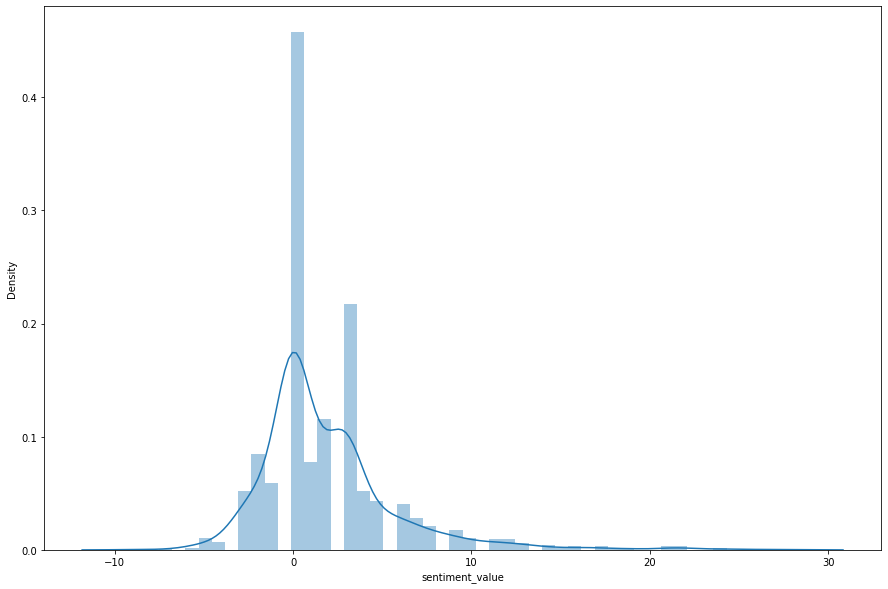

In [76]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

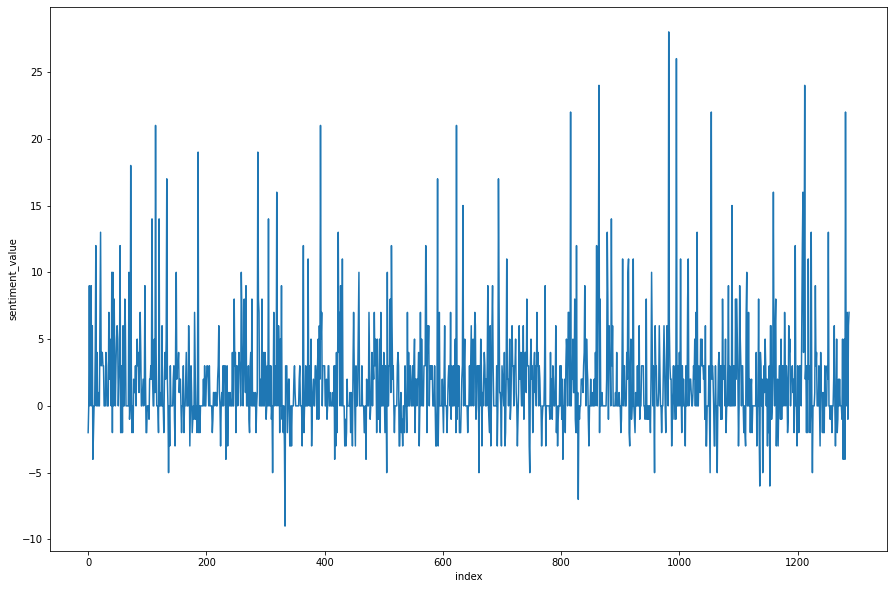

In [77]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

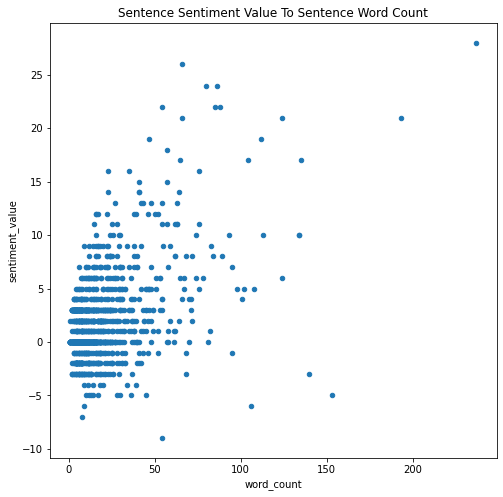

In [78]:
#Scatter plot for correlation between no. of words and sentiment value
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),
                     title='Sentence Sentiment Value To Sentence Word Count')